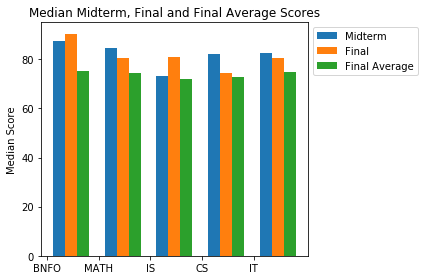

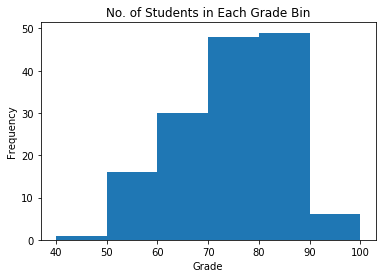

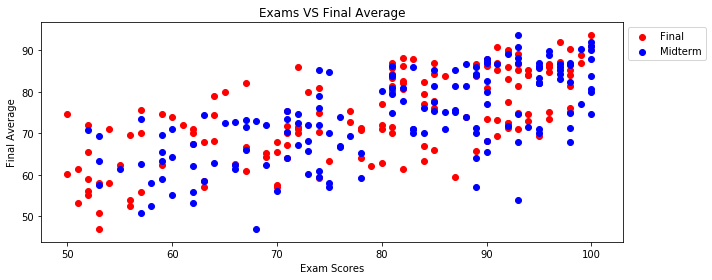

In [228]:
''' 
Author: Navado (Romaine) Wray
Date: 2020-03-02
CS301-006, Professor Watson
HW05 Solution

Description: Using matplotlib we create visualizations of the class grades based on majors and grade bins.

Link to the github repo: https://github.com/nrw24/Data-Science
Link to the relevant git commit: https://github.com/nrw24/Data-Science/blob/master/HW5.ipynb
name of the branch: master

'''

import pandas as p
from matplotlib import pyplot as plt
import numpy as np

df = p.read_csv("student_class.csv")
majors = {}
for major in df["Majors"]:
    majors[major] = df.loc[df["Majors"] == major ]

    
final_median = []
midterm_median = []
final_avg_median = []

for major in majors:
    major_row  = majors[major]
    final_median.append(major_row["Final"].median())
    midterm_median.append(major_row["Midterm"].median())
    final_avg_median.append(major_row["Final Average"].median())

#use dict keys as x values
labels = majors.keys()

x = np.arange(len(labels))  # the label locations

width = .7  # the width of the bars

fig, ax = plt.subplots()

rect1 = ax.bar(x + width/3, midterm_median, width/3, label='Midterm')
rect2 = ax.bar(x + 2*width/3, final_median, width/3, label='Final')
rect3 = ax.bar(x + width, final_avg_median, width/3, label='Final Average')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Median Score')
ax.set_title('Median Midterm, Final and Final Average Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

fig.tight_layout()

plt.show()

#Create bins for the histogram
grade_bins = df["Numeric Bin"].unique()
grade_bins = np.sort(grade_bins)
grade_bins = np.append(grade_bins, 100)

#Create labels and title
plt.ylabel('Frequency')
plt.xlabel('Grade')
plt.title('No. of Students in Each Grade Bin')

plt.hist(df["Final Average"], bins=grade_bins)


#Create a scatter plot of exam scores vs final average
minx =  np.arange(df["Final"].min())
if df["Final"].min() > df["Midterm"].min() :
    minx = np.arange(df["Midterm"].min())
fig, ax = plt.subplots()
ax.scatter(df["Final"], df["Final Average"], c='red', label='Final')
ax.scatter(df["Midterm"], df["Final Average"], c='blue', label='Midterm')
ax.set_ylabel('Final Average')
ax.set_xlabel('Exam Scores')
ax.set_title('Exams VS Final Average')
ax.set_xticklabels([40, 50, 60, 70, 80, 90, 100])
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)

fig.set_size_inches((10,4))
fig.tight_layout()


plt.show()